In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
model = load_model('improved_ann_model.keras')
print("Model berhasil di-load")
model.summary()

2025-10-21 17:50:28.668415: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-10-21 17:50:28.668818: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-10-21 17:50:28.668829: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1761043828.669849 4363661 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1761043828.671103 4363661 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model berhasil di-load


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,376,907 (73.92 MB)

 Trainable params: 6,458,371 (24.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 12,916,744 (49.27 MB)

In [ ]:
class_labels = ['YOUNG', 'MIDDLE', 'OLD']

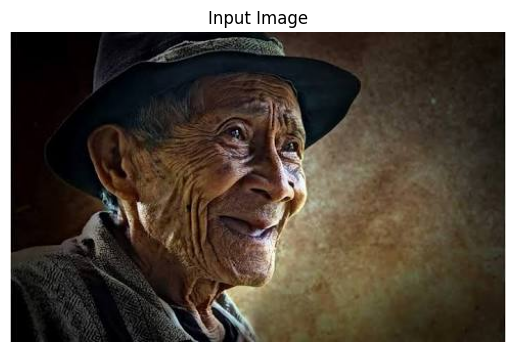

In [ ]:
# Ukuran gambar yang dipakai saat training
IMG_SIZE = 64

# Path gambar uji
img_path = 'faces_test/part3/orangtua1.jpg'

# Load & tampilkan gambar
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()

In [ ]:
# Preprocessing sesuai training
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img_array = img_resized.astype('float32') / 255.0
img_array = np.expand_dims(img_array, axis=0)  # (1, 64, 64, 3)

In [ ]:
# Prediksi
pred = model.predict(img_array)
class_idx = np.argmax(pred, axis=1)[0]
confidence = pred[0][class_idx] * 100

print(f"Prediksi: {class_labels[class_idx]} ({confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Prediksi: OLD (65.77%)


2025-10-21 17:50:30.069913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


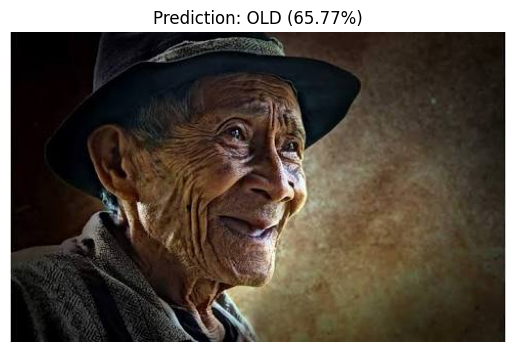

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {class_labels[class_idx]} ({confidence:.2f}%)")
plt.show()

**Penjelasan**

Hasil prediksi model terhadap gambar uji memberikan probabilitas sebesar 65,77% pada kelas OLD. Nilai probabilitas ini menunjukkan tingkat keyakinan model terhadap prediksinya. Probabilitas yang tidak mencapai 100% merupakan hal yang wajar, mengingat model menggunakan arsitektur ANN sederhana dan tidak dilatih dengan dataset dalam jumlah sangat besar. Selain itu, perbedaan kondisi gambar uji dengan data training (pencahayaan, angle, latar belakang) juga dapat mempengaruhi tingkat kepercayaan model. Dengan demikian, meskipun confidence tidak maksimal, prediksi ini tetap valid dan mencerminkan kemampuan generalisasi model.